# Simple clustering analysis

## Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Loading the data

In [3]:
data = pd.read_csv('3.01. Country clusters.csv')

In [4]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plotting the data

<function matplotlib.pyplot.show(close=None, block=None)>

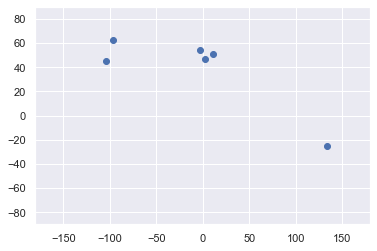

In [5]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Selecting the features

In [6]:
x = data.iloc[:,1:3]

In [7]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [14]:
kmeans = KMeans(2) #in bracket is the number of clusters we want

In [15]:
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [16]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [17]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters #adding a new column in the data set
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

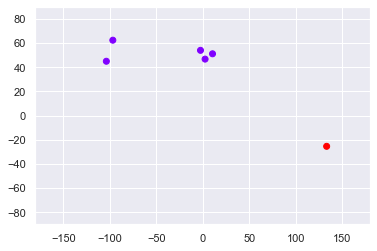

In [18]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Selecting the number of clusters
 

### WCSS

In [19]:
kmeans.inertia_

13205.758119999999

In [20]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [21]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

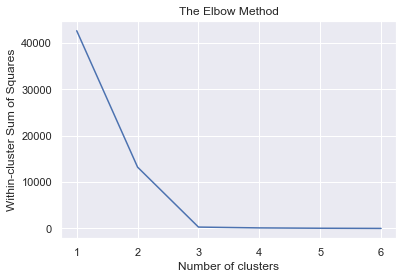

In [22]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')